# Machine Learning Notebook: Kernels, Kernel SVM and other fun stuff

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold

# Set plot style
sns.set(style='whitegrid')

## Symmetric Positive Kernels

Let $\mathcal{X}$ be a feature space. We say that
$$K : \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R} $$
is a symmetric positive kernel on $\mathcal{X}$ when $\forall n \geq 1, \forall x_1, \dots, x_n \in \mathcal{X}$, the matrix $(K(x_i, x_j))_{1 \leq i, j \leq n} \in \mathcal{S}_n^{+} (\mathbb{R})$

When $n$ and $x_1, \dots, x_n \in \mathcal{X}$ are fixed, the matrix $(K(x_i, x_j))_{1 \leq i, j \leq n}$ is usually refered to as the kernel matrix.

The following block of code lets you vizualize the kernel matrices of two kernels in a toy example.

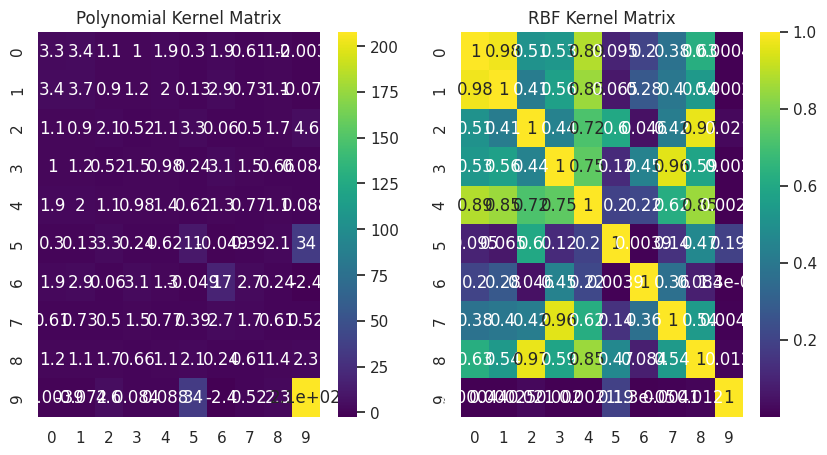

In [2]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel, linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns

# Toy dataset
X = np.random.randn(10, 2)

# Compute kernel matrices
K_poly = polynomial_kernel(X, degree=3)
K_rbf = rbf_kernel(X, gamma=0.5)

# Visualize the kernel matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(K_poly, ax=axes[0], annot=True, cmap='viridis')
axes[0].set_title("Polynomial Kernel Matrix")
sns.heatmap(K_rbf, ax=axes[1], annot=True, cmap='viridis')
axes[1].set_title("RBF Kernel Matrix")
plt.show()

**Question 1** Quickly justify why the functions polynomial_kernel and rbf_kernel in the previous code define symmetric positive kernels. You can use the sklearn documentation to obtain more information on those functions.

**Question 2** What property of the kernel matrices can we immediately see in the previous plots ?

## Kernel SVM

Let $(x_1, y_1), \dots, (x_n, y_n) \in \mathcal{X} \times \{-1, 1 \}$, the point of the $2$-classes classification problem is to build a function $f$ such that
$$ f(x) \approx y $$
on unseen data $(x, y)$.

As we saw in class, Kernel SVM is a machine learning method that estimates a $2$-classes predictor by a function of the form
$$ f(x) = \text{sgn} \bigg( \alpha_1 K(x_1, x) + \dots + \alpha_n K(x_n, x) \bigg)$$
where the $\alpha$'s minimize the following expression :    
$$ \sum_{i = 1}^n \bigg(1 - y_i \bigg( \alpha_1 K(x_1, x_i) + \dots + \alpha_n K(x_n, x_i) \bigg)\bigg)_+ + \lambda \sum_{1 \leq i, j \leq n} \alpha_i \alpha_j K(x_i, x_j) \;.$$

The following code uses this method on a toy example called the "two moons" dataset. Warning : the two classes are encoded on $\{0, 1 \}$ instead of $\{-1, 1 \}$, remember to switch between the two encodings when needed.

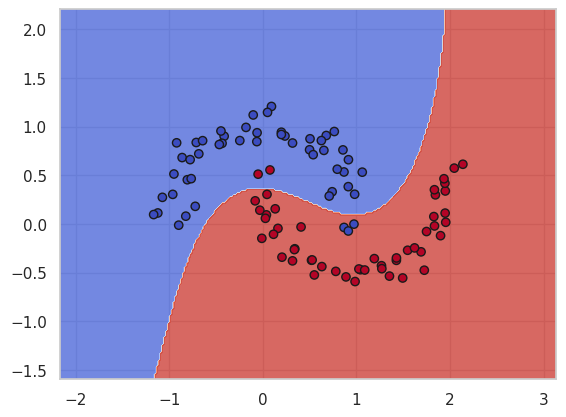

In [3]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a toy dataset
X, y = make_moons(n_samples=100, noise=0.1)

# Train Kernel SVM
clf = SVC(kernel='rbf', C=1., gamma=0.5)
clf.fit(X, y)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.show()

plot_decision_boundary(clf, X, y)


**Question 3** By modifying the previous cell (Copy-Paste the moddified versions below), present two examples, one with a clear underfitting situation, and one with a clear overfitting situation. The meaningful parametters to play with are the kernel type in SVC, the regularization parametter in SVC and the noise level in the data generation.

In [4]:
# Put the code for the underfitting example here

In [5]:
# Put the code for the overfitting example here

## Kernel SVM By Hand

Now that we have played with Kernel SVMs a bit, let's implement one ourselves (instead of using an already made library) !

**Question 4** By using the dual and using KKT conditions, show that finding the optimal $\alpha$'s for the SVM classifier can be done by solving the following problem :    

$$ (\alpha_1, \dots, \alpha_n) \in \text{argmin} \frac{1}{2} \sum_{1 \leq i, j \leq n} \alpha_i \alpha_j K(x_i, x_j) - \sum_{i = 1}^n \alpha_i y_i $$
$$ \text{s.t.} \quad \forall i, 0 \leq \alpha_i y_i \leq C $$
where $C$ is a constant that you will link to to previous quantities of the problem. In particular, you should justify why strong duality holds.

**Question 5** Complete the following script in order to implement your own Kernel SVM class. You can use any optimization solver freely, in particular you can use the quadratic programming solver from cvxopt in order to solve the dual problem (https://readthedocs.org/projects/cvxopt/downloads/pdf/dev/).

In [6]:
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

class SVM():
    """
    Class to Handle SVMs.
    """
    def __init__(self, kernel='linear', C=1., **kwargs):
        """
        Initializes an SVM solver with regulizer constant C on the dual box constraint.
        """

    def fit(self, X, y, precomputed_kernel_train=None):
        """
        Fits the given data F(X)=y. You can pass a precomputed data kernel K(X, X).
        """

    def predict(self, X, precomputed_kernel_train_eval=None):
        """
        Predicts f(X). You can pass the precomputed kernel K(X_eval, X_train).
        """

Your code should work on the following examples :

In [7]:
# Generate a toy dataset
X, y = make_moons(n_samples=100, noise=0.1)

## Linear Kernel

# Train Kernel SVM
clf = SVM(kernel='linear', C=1.)
clf.fit(X, y)

# Visualize the decision boundary
plot_decision_boundary(clf, X, y)

## Polynomial Kernel

# Train Kernel SVM
clf = SVM(kernel=polynomial_kernel, C=1., degree=3)
clf.fit(X, y)

# Visualize the decision boundary
plot_decision_boundary(clf, X, y)

## Gaussian Kernel

# Train Kernel SVM
clf = SVM(kernel=rbf_kernel, C=1., gamma=1)
clf.fit(X, y)

# Visualize the decision boundary
plot_decision_boundary(clf, X, y)

AttributeError: 'NoneType' object has no attribute 'reshape'

## Exotic Feature Spaces and Kernels

Kernels allow working with data that is not necessary in an Euclidean space, or by using handcrafted comparison rules that are not based on Euclidean structure.

**Question 6** Among the following kernel candidates $K$, which ones are symmetric positive kernels on their respective $\mathcal{X}'s$ ? Wou will give a formal proof or a counter-example in each case.

-  $\mathcal{X}=\mathbb{R}$, $\forall x, y \in \mathcal{X}, K(x, y) = \cos(x-y)$

-  $\mathcal{X}=\mathbb{R}$, $K : \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}_+$ that is symmetric.

-  $\mathcal{X}=(-1, 1)$, $\forall x, y \in \mathcal{X}, K(x, y) = 1/(1-xy)$

-  Let $(\Omega, \mathcal{T}, \mathbb{P})$ be a probability space, $\mathcal{X}=\mathcal{T}$, $\forall A, B \in \mathcal{X}, K(A, B) = \mathbb{P}(A \cap B) - \mathbb{P}(A) \mathbb{P}(B)$

- $\mathcal{X}=\mathbb{R}_+$, $\forall x, y \in \mathcal{X}, K(x, y) = \min(x, y)$ (Hint : retresent the min as an integral of indicator functions)

- $\mathcal{X}=\mathbb{N}$, $\forall x, y \in \mathcal{X}, K(x, y) = \gcd(x, y)$ (Hint : use the last point)

- $\mathcal{X}=\mathbb{N}$, $\forall x, y \in \mathcal{X}, K(x, y) = 1/ \text{lcm}(x, y)$